In [2]:
from DataProcessing import Data
import tensorflow as tf
from tensorflow import keras as keras

2024-04-08 21:53:00.434476: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 21:53:00.467973: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 21:53:00.468811: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 21:53:01.054301: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 1. Get Data

## 1.1. Get data from folder

In [3]:
d = Data()
d.get_index_names()

S&P 500: ['AAPL', 'ORCL', 'GOOGL', 'AMZN', 'BK', 'LIFE', 'T', 'XOM']
 VN: ['VHM', 'CTR', 'FPT', 'MBB']


['AAPL',
 'ORCL',
 'GOOGL',
 'AMZN',
 'BK',
 'LIFE',
 'T',
 'XOM',
 'VHM',
 'CTR',
 'FPT',
 'MBB']

In [35]:
chosen_index = 'AAPL'
df = d.get_data(chosen_index).drop(['Date','Volume'],axis=1)

In [4]:
X = df[df.columns[0:6]].values
Y = df[df.columns[6]].values

TRAIN_PERCENT = 0.7
train_size = int(TRAIN_PERCENT*len(X))

X_train = X[0:train_size]
Y_train = Y[0:train_size]
X_test = X[train_size:len(X)]
Y_test = Y[train_size:len(Y)]

# 2. Train model

In [5]:
rnn_model = keras.Sequential()
rnn_model.add(keras.layers.LSTM(100,input_shape=(None,6),return_sequences=True,activation='relu'))
rnn_model.add(keras.layers.Dense(1))
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 100)         42800     
                                                                 
 dense (Dense)               (None, None, 1)           101       
                                                                 
Total params: 42901 (167.58 KB)
Trainable params: 42901 (167.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [8]:
num_epochs = 400
batch_size = 1
learning_rate = 0.001
Adam = keras.optimizers.Adam(learning_rate)
MSE = keras.losses.MeanSquaredError()

## 2.1. Train

In [11]:
rnn_model.compile(optimizer=Adam,loss=MSE)
rnn_model.fit(X_train,Y_train,epochs=num_epochs,validation_data=(X_test,Y_test),batch_size=batch_size)

Epoch 1/400
871/871 [==============================] - 2s 1ms/step - loss: 599.1493 - val_loss: 43.9857
Epoch 2/400
871/871 [==============================] - 1s 1ms/step - loss: 13.2661 - val_loss: 12.2430
Epoch 3/400
871/871 [==============================] - 1s 975us/step - loss: 11.8680 - val_loss: 14.6746
Epoch 4/400
871/871 [==============================] - 1s 985us/step - loss: 11.8635 - val_loss: 11.9028
Epoch 5/400
871/871 [==============================] - 1s 1ms/step - loss: 10.4534 - val_loss: 15.8106
Epoch 6/400
871/871 [==============================] - 1s 1ms/step - loss: 9.7802 - val_loss: 10.3245
Epoch 7/400
871/871 [==============================] - 1s 984us/step - loss: 9.9926 - val_loss: 9.8767
Epoch 8/400
871/871 [==============================] - 1s 1ms/step - loss: 9.8929 - val_loss: 39.0511
Epoch 9/400
871/871 [==============================] - 1s 1ms/step - loss: 9.8771 - val_loss: 10.9204
Epoch 10/400
871/871 [==============================] - 1s 1ms/step - l

## 2.2. Test

In [29]:
Y_pred = rnn_model.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [24]:
Y_pred.shape

(374, 1, 1)

In [33]:
Y_pred = Y_pred.reshape(374)

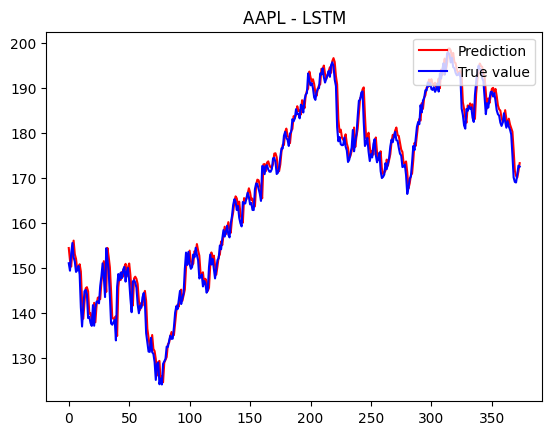

In [36]:
import matplotlib.pyplot as plt
plt.plot(Y_pred,c='red',label = 'Prediction')
plt.plot(Y_test,c='blue',label = 'True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - LSTM')
plt.show()